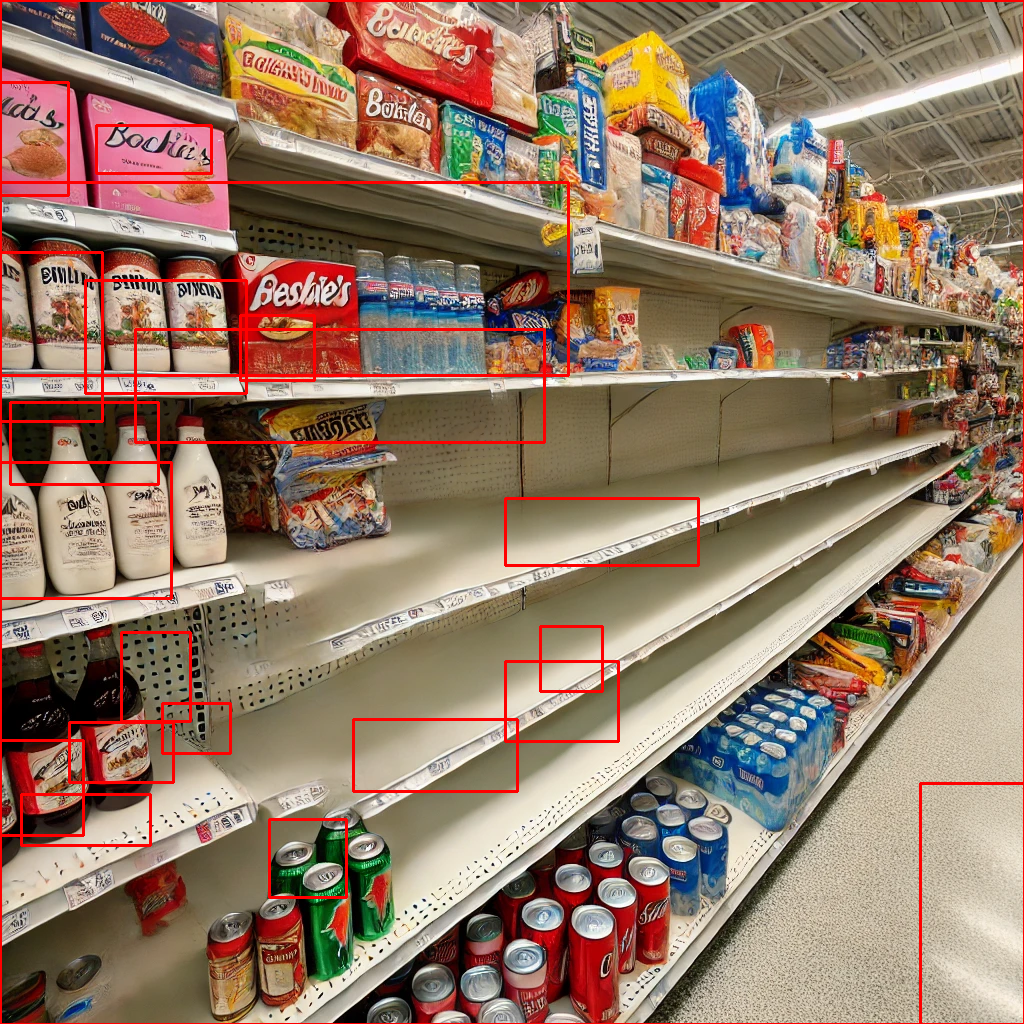

In [3]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from google.colab.patches import cv2_imshow

def detect_stock_changes(reference_image_path, current_image_path):
    # Load images
    ref_img = cv2.imread(reference_image_path)
    curr_img = cv2.imread(current_image_path)

    # Convert images to grayscale
    ref_gray = cv2.cvtColor(ref_img, cv2.COLOR_BGR2GRAY)
    curr_gray = cv2.cvtColor(curr_img, cv2.COLOR_BGR2GRAY)

    # Compute Structural Similarity Index (SSIM)
    score, diff = ssim(ref_gray, curr_gray, full=True)
    diff = (diff * 255).astype("uint8")

    # Apply threshold to highlight differences
    _, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)

    # Find contours of differences
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw rectangles around detected differences
    for contour in contours:
        if cv2.contourArea(contour) > 1000:  # Ignore small noise
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(curr_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Show the output
    cv2_imshow(curr_img)

# Run the function
reference_image = "/content/shelf_full.jpg"  # Fully stocked shelf image
current_image = "/content/shelf_current.jpg"  # Shelf with missing products
detect_stock_changes(reference_image, current_image)
